In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import gc
import math
from tqdm.notebook import tqdm

In [2]:
#Load Data
transactions = pd.read_csv("./transactions_train.csv") # 50 Mil # 3,5 GB # 2018-2020
articles = pd.read_csv("./articles.csv") # 
customers = pd.read_csv("./customers.csv")

In [3]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [4]:
articles.head()
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [5]:
# Preprocessing - Reducing DATA size
##First 5 days of tansactions
trans_3_months = transactions[transactions['t_dat'].map(lambda x: x < '2018-09-25')]
trans_3_months.sort_values(by='t_dat',ascending = False).head()
popular_customers = trans_3_months['customer_id'].value_counts()

## Get a sample of customers - reduce customer numbers
popular_customers = trans_3_months['customer_id'].value_counts().reset_index(name = 'counts')
popular_customers = popular_customers.sample(n=1000,replace=True)
#popular_customers_ = popular_customers[0:100]
## 
cust_and_article = trans_3_months.drop(['sales_channel_id','t_dat','price'], axis=1)
cust_and_article = cust_and_article.drop_duplicates(subset=['customer_id','article_id'])

pop_cust_articles = pd.merge(popular_customers,cust_and_article, left_on = 'index',right_on = 'customer_id',how = 'left')
pop_cust_articles = pop_cust_articles.drop(['index'],axis =1)

# reduce size of articles based on bought articles
bought_articles = pd.merge(pop_cust_articles,articles,on = 'article_id',how = 'left')

bought_articles = pd.merge(pop_cust_articles,articles,on = 'article_id',how = 'left')



In [6]:
print(bought_articles.describe())
pop_cust_articles.describe()
print(popular_customers.head())

            counts    article_id   product_code  product_type_no  \
count  3417.000000  3.417000e+03    3417.000000      3417.000000   
mean      7.434592  5.900445e+08  590044.464442       251.643840   
std       6.893163  1.004660e+08  100466.024515        55.477065   
min       1.000000  1.087750e+08  108775.000000        -1.000000   
25%       3.000000  5.564380e+08  556438.000000       252.000000   
50%       5.000000  6.203370e+08  620337.000000       262.000000   
75%       9.000000  6.605990e+08  660599.000000       272.000000   
max      37.000000  7.299310e+08  729931.000000       512.000000   

       graphical_appearance_no  colour_group_code  perceived_colour_value_id  \
count             3.417000e+03        3417.000000                3417.000000   
mean              1.009718e+06          28.738074                   3.436933   
std               1.727847e+04          27.145429                   1.447830   
min              -1.000000e+00          -1.000000                  

In [7]:
buyer = []
article_buyer_dic = {}
# result = []
# We loop through article ID
for article_id in bought_articles['article_id']:
    for index, transaction in pop_cust_articles.iterrows():
          
        if article_id == transaction['article_id']:
            buyer.append(transaction['customer_id'])
    
    #print(article_id)   
    #print(buyer)  
    article_buyer_dic[article_id] = buyer
    # result.append(article_buyer_dic)
    #new customer Id
    # article_buyer_dic = {}
    buyer = []

In [8]:
df_article_buyers= pd.DataFrame(article_buyer_dic.items(), columns=['article_id', 'buyers'])

In [9]:
pd.set_option('display.max_colwidth', None)
df_article_buyers.head(10)

,article_id,buyers
0,669713004,[8655d05a68c17fba027894080dfb93e0791547a3df413f5d31cfa20352cb512d]
1,487932043,[8655d05a68c17fba027894080dfb93e0791547a3df413f5d31cfa20352cb512d]
2,574109015,"[126885a9faed4daf5bd57be623460a6ae7139c6848f8f535dc7a40b378c4f79f, aa9040ed7e3dde9ca0a794ba9a93e2e75040e323c7545ab384e843b91b9c4734, 6f0d610c3900b53991a13faddd72fb10c926802396c1a003ad485adc3e31c912, e7df0184688d173429a605f52ff50d3c0745dca3ece5e5730275a09cdfe08ec3, 1a8f9d9830d9a097214a35e6c15a03ba495b0ef133b7747e4dcb219f435a6fb4, 79d5553ec3ccdb37d4947827910b2299c68f8138547b823020d78b0eff549e0d, 3fc8ae2fb5576f50739444124e673ad439777c0244ea6804310efd30dfaad55a]"
3,626587003,[126885a9faed4daf5bd57be623460a6ae7139c6848f8f535dc7a40b378c4f79f]
4,661152002,"[126885a9faed4daf5bd57be623460a6ae7139c6848f8f535dc7a40b378c4f79f, 47a148d88a39ee8d64bfd70e688283e80315f197e78f4c3e2cf8f41d8cf68120]"
5,372860001,"[e314080eb07873e4314d9b91f73c2a293a68c0b9507819ad2ff109e8e113eacf, 2353eafda73562b24b8ce5b8c18d16ce3bd78794754fc130a3a16fa5e09a9c95, 713b63c572cc66b58e69e506823347af86a4853ebc216d185a96e5a2a19d81ff]"
6,507883009,[e314080eb07873e4314d9b91f73c2a293a68c0b9507819ad2ff109e8e113eacf]
7,557248020,[e314080eb07873e4314d9b91f73c2a293a68c0b9507819ad2ff109e8e113eacf]
8,456163024,"[e314080eb07873e4314d9b91f73c2a293a68c0b9507819ad2ff109e8e113eacf, a5b99c6eca7c2aa7ad4284f0e6b7265894dc81e24e857e4be67314b284b67cc5, 1d8441b4dcd20e5b6b787fd59b98199f1ea9d95293f6eb64273ba00c3e02169f]"
9,372860002,"[e314080eb07873e4314d9b91f73c2a293a68c0b9507819ad2ff109e8e113eacf, 79f3baf8ab5d901a0c343599928701f2e9bd13a91e713c146f2e0212d13d21bb, 6e1f6e367f22b8d323c229d3406a625c4b388388bce3abd6cffbb0345c1408c8, 56e9a75cdbe574862fc8bb933337fefcf5cb8732d1ea92a8f1d861a6e79c2d8b, 2cbd83b6953a65d5b80d35faaf9fe59289af6f1146aa4b1d5b36b63ae7960a11]"


In [33]:
graph = nx.DiGraph()
# Nodes are buyers

graph.add_nodes_from(popular_customers['index'])
list(graph.nodes)

#

['2fdf822dbaad2b983b37e651a982bba24352a92c8a5c4c75be25c771f2af6d13',
 'a81e0b7657a090198d8138c95fae7db1218305b97bb8fd3f42b8d8e1b6d5b846',
 '4aa23f5f3013303a7f194972fd68cf5cb04cdc88ab69bee8acf06283e7988e15',
 'f6fbb1480291047c308f83a25e8e8b1e2c5a44a9390662b1d8435f700b5555db',
 '3657f79cf5f3622e4506a3a9c91bb610572ad2d34458b12abdd7c06274d1980b',
 '55e7d8de6acc36f8e77d681ccfab65dd67bae06cd4e2889b44f472f033aca0e8',
 '05c5685f1301de31ac4463293228f74ba1b3b427dc1a79dbf54f0cf98f242e81',
 '4043eeb9fb65b1735639ce44efbc5c43d2f9160fb26c8da6d73ed2e211a01fdf',
 '31287b3d29b025cf00822b66b462a415e9c58d6538562709292c54d2bb6af25a',
 '4fa96051d6715de656891c600846990aa7e224086969f0c690eec96b4b3fe6eb',
 '00294f5274dbc84408d60fc661860d385c2901dccca8c4145cccb90d63ef2b82',
 '59b187ce9d974d35f6520bcb1964ca6a43ecc0468508c781f090014e41ac6318',
 'bf61585d343b5dc63f2ca1bc8354d4e51a7dc775dc6cba2d98e2faed611a9158',
 '2bd14297cd41818e5439a2f05867dec2f622636fb844f01e85c8c80f8a5e0c5f',
 '75dc37645fb9210bd177b52e20f3b79e

In [34]:
#EDGES
for customer in popular_customers['index']:
    # Check if customer is an buyer
    for buyers in  df_article_buyers['buyers']:
        if customer in buyers:
            
            for buyer in buyers:
                if buyer != customer:
                    print(buyer)
                    print(customer)
                    print(True)
                    graph.add_edge(customer, buyer)

cd6a77f49e398adc2f16a4a30187c38281f7ffb3de930da5f6b3d5d6ad3bfcbc
5b17a1b27cf8e7d6faece49981a96bebb8f4963a577361baf1eed819ccd05209
True
4799b90cfe534c8829805dbb2c4f3597fca1f51fe3abea32a9c6d705cd32ee6d
5b17a1b27cf8e7d6faece49981a96bebb8f4963a577361baf1eed819ccd05209
True
5505738ef3c126c584fcc94b19ca42ceec62c92dfb1a695913532baab251fb47
5b17a1b27cf8e7d6faece49981a96bebb8f4963a577361baf1eed819ccd05209
True
5673f8b291522bb2977194a228af8c60f79c9bfd1578c92f31acb133c6f68ef6
5b17a1b27cf8e7d6faece49981a96bebb8f4963a577361baf1eed819ccd05209
True
e9971c15c1058cfbdaceeb3e5694a7c0e89cd98363593db6c3ea4b42f999ad74
5b17a1b27cf8e7d6faece49981a96bebb8f4963a577361baf1eed819ccd05209
True
cd6a77f49e398adc2f16a4a30187c38281f7ffb3de930da5f6b3d5d6ad3bfcbc
5b17a1b27cf8e7d6faece49981a96bebb8f4963a577361baf1eed819ccd05209
True
d85746a3c49bc85ded25d8f0439f54cb94c63216a42f95a6843fba38cc7d1c72
5b17a1b27cf8e7d6faece49981a96bebb8f4963a577361baf1eed819ccd05209
True
5505738ef3c126c584fcc94b19ca42ceec62c92dfb1a695913532ba

In [35]:
## Removes nodes with no edges
graph.remove_nodes_from(list(nx.isolates(graph)))

In [13]:
popular_customers = trans_3_months['customer_id'].value_counts().reset_index(name = 'counts')
popular_customers.head(15)

,index,counts
0,2fdf822dbaad2b983b37e651a982bba24352a92c8a5c4c75be25c771f2af6d13,103
1,a81e0b7657a090198d8138c95fae7db1218305b97bb8fd3f42b8d8e1b6d5b846,100
2,4aa23f5f3013303a7f194972fd68cf5cb04cdc88ab69bee8acf06283e7988e15,80
3,f6fbb1480291047c308f83a25e8e8b1e2c5a44a9390662b1d8435f700b5555db,72
4,3657f79cf5f3622e4506a3a9c91bb610572ad2d34458b12abdd7c06274d1980b,55
5,55e7d8de6acc36f8e77d681ccfab65dd67bae06cd4e2889b44f472f033aca0e8,54
6,05c5685f1301de31ac4463293228f74ba1b3b427dc1a79dbf54f0cf98f242e81,52
7,4043eeb9fb65b1735639ce44efbc5c43d2f9160fb26c8da6d73ed2e211a01fdf,52
8,31287b3d29b025cf00822b66b462a415e9c58d6538562709292c54d2bb6af25a,52
9,4fa96051d6715de656891c600846990aa7e224086969f0c690eec96b4b3fe6eb,51


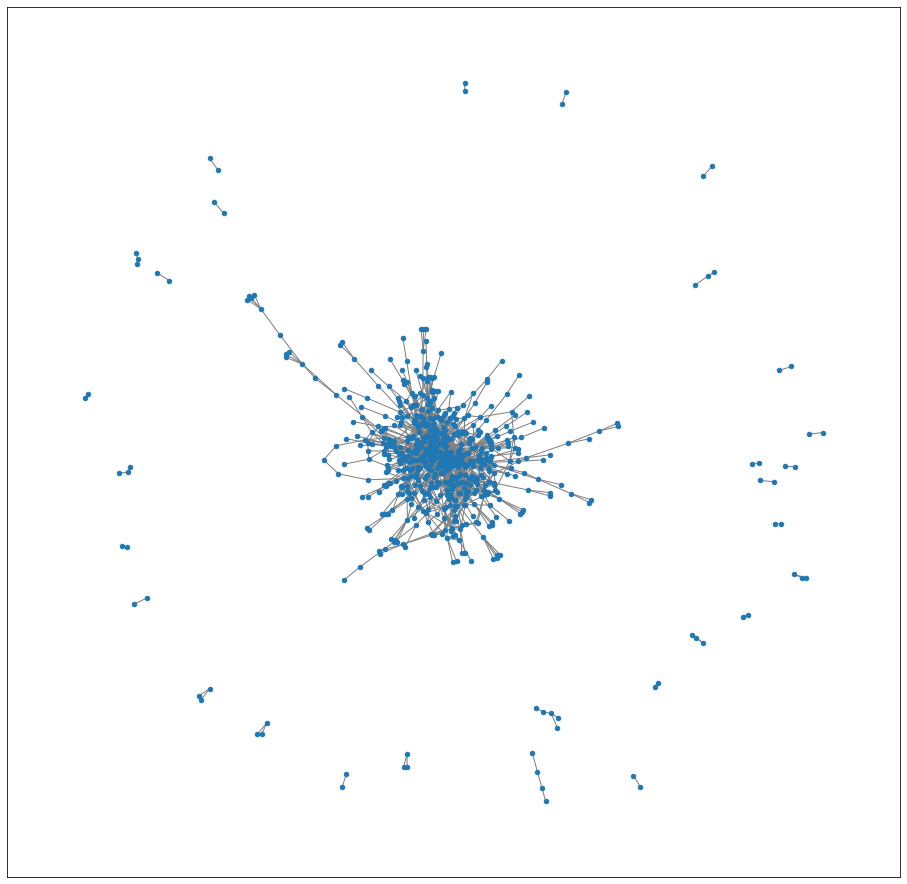

In [14]:

plt.figure(3,figsize=(16,16)) 
cluster = nx.draw_networkx(graph, with_labels=False, node_size = 20, edge_color="tab:gray")
plt.show()

# ToDo
# - Delete node which has no edge



# -

In [15]:
!pip install python-louvain

AttributeError: 'NoneType' object has no attribute 'is_directed'

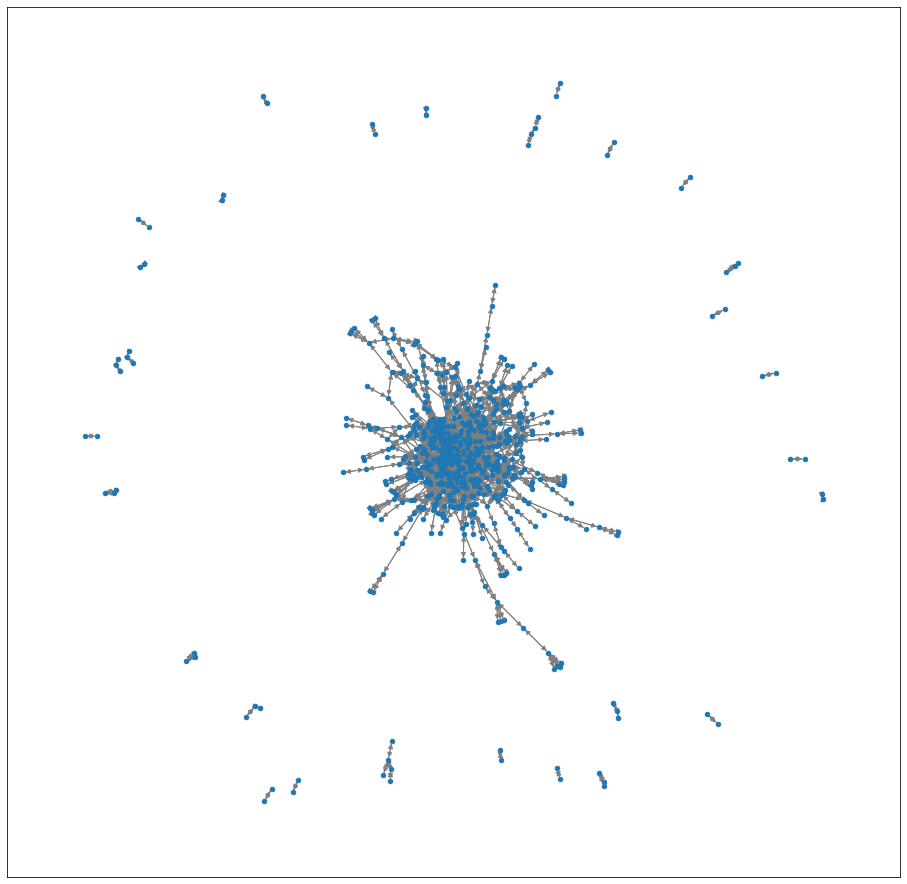

In [37]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
plt.figure(3,figsize=(16,16)) 
# load the karate club graph
G = nx.draw_networkx(graph, with_labels=False, node_size = 20, edge_color="tab:gray")
#first compute the best partition
partition = community_louvain.best_partition(G)

# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

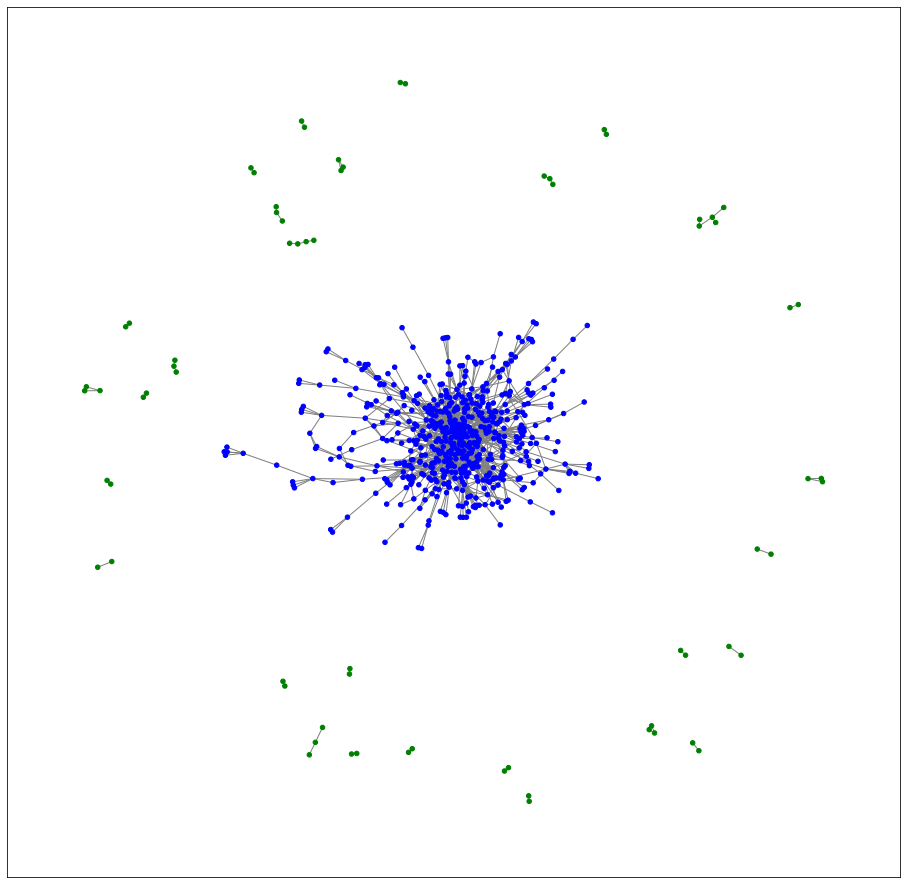

In [29]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

# # load the karate club graph
# G = nx.draw_networkx(graph, with_labels=False, node_size = 20, edge_color="tab:gray")
# #first compute the best partition
# partition = community_louvain.best_partition(G)

# # draw the graph
# pos = nx.spring_layout(G)
# # color the nodes according to their partition
# cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
# nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
#                        cmap=cmap, node_color=list(partition.values()))
# nx.draw_networkx_edges(G, pos, alpha=0.5)
# plt.show()
plt.figure(3,figsize=(16,16)) 

def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg
    
# find communities in the graph
c = girvan_newman(graph.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))


# plot the communities
color_map = []
for node in graph:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  

nx.draw_networkx(graph, node_color=color_map, with_labels=False, node_size = 20, edge_color="tab:gray")
plt.show()

In [30]:
f = nx.Graph()                                                                                                                                     
fedges = filter(lambda x: graph.degree()[x[0]] > 3 and graph.degree()[x[1]] > 3, graph.edges())
f.add_edges_from(fedges)

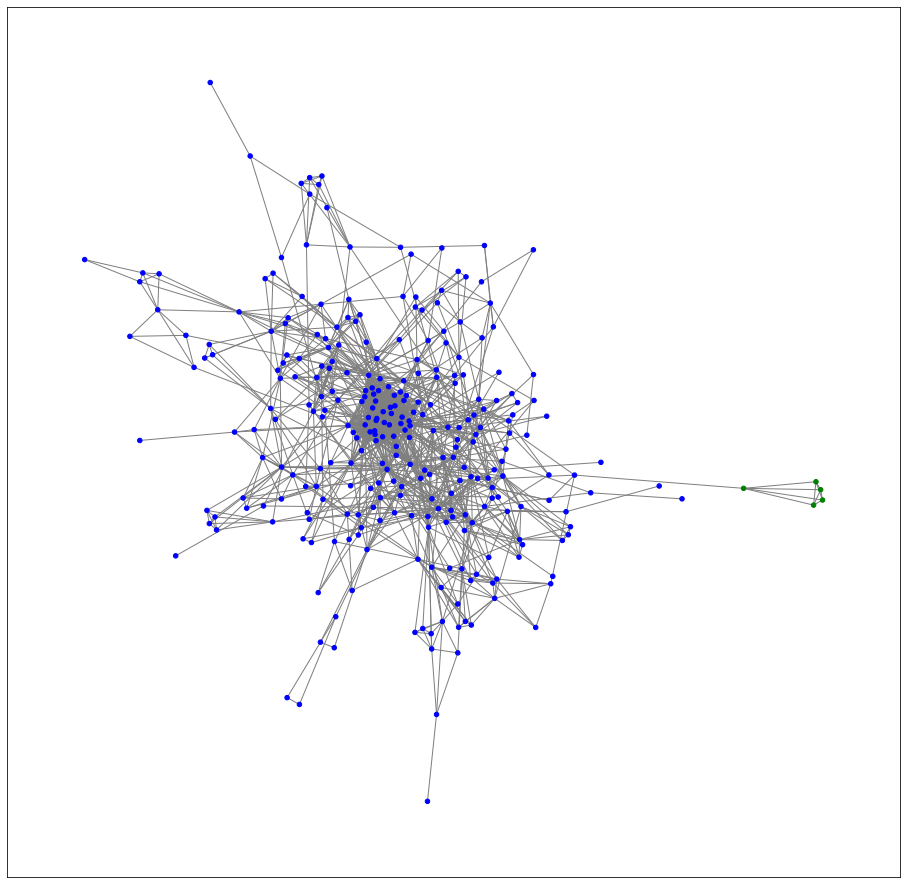

In [31]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

# # load the karate club graph
# G = nx.draw_networkx(graph, with_labels=False, node_size = 20, edge_color="tab:gray")
# #first compute the best partition
# partition = community_louvain.best_partition(G)

# # draw the graph
# pos = nx.spring_layout(G)
# # color the nodes according to their partition
# cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
# nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
#                        cmap=cmap, node_color=list(partition.values()))
# nx.draw_networkx_edges(G, pos, alpha=0.5)
# plt.show()
plt.figure(3,figsize=(16,16)) 
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg
    
# find communities in the graph
c = girvan_newman(f.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))


# plot the communities
color_map = []
for node in f:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  

nx.draw_networkx(f, node_color=color_map, with_labels=False, node_size = 20, edge_color="tab:gray")
plt.show()